<div style="background-color:orange;text-align:center;vertical-align:middle"><table><tr><td><pre>
<!-- <center><h1><font color='darkorange'>Kodluyoruz & Patika.dev Academy</font></h1></center> -->
<p align="center"><img src="https://i.im.ge/2021/09/11/TQ9Pvp.png" alt="TQ9Pvp.png" width=500></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/02/kodluyoruz_logo_sosyalgirisim.png-->
<p align="center"><img src="https://upload.wikimedia.org/wikipedia/tr/9/9f/Eczac%C4%B1ba%C5%9F%C4%B1_spor_kul%C3%BCb%C3%BC_%28logo%29.jpg" alt="TQmmAq.jpg" width=70></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/03/Frame.png-->
<center><h1><em><font color='darkorange'>110. VitrA Veri Bilimi Bootcamp </font></em></h1></center>
<center><h2><em><font color='darkorange'>September-2021</font></em></h2></center>
<table style="width:35%">
    <tr>
        <td><b>Project:</b></td>
        <td>Vitra - Pharma Sales Prediction </td>
    </tr>
    <tr>
        <td><b>Data Owner:</b></td>
        <td>Sercan Kara</td>
    </tr>
    <tr>
        <td><b>Group Members:</b></td>
        <td>Erkan Çetinyamaç</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Yağmur Uzun</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Arda Can Baysar</td>
  </tr>
  <tr>
        <td></td>
        <td>Eren Kaya</td>
  </tr>
    <tr>
        <td></td>
        <td>Melike Demirdağ</td>
  </tr>
</table>
</pre></td></tr></table></div>

# **Problem Description and Aim Of The Project**

Since predicting to feature sales holds crucial importance for a company, it is vital to build a model to predict next sale amounts in order to company can benefit from this critical intel. Therefore, our project group aims to build a model that can predict next sale amounts.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# **Data Preprocess and Feature Engineering**

In [3]:
df = pd.read_excel('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/DataPharma.xlsx')
#df = pd.read_excel('/content/DataPharma.xlsx')
from sklearn.utils import shuffle
#df = shuffle(df)

In [4]:
df.shape

(48288, 5)

In [5]:
df.head(10)

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ANKARA,16
1,2017,201701,PRODUCT_A,ANKARA,25
2,2017,201701,PRODUCT_A,ANKARA,56
3,2017,201701,PRODUCT_A,ANKARA,16
4,2017,201701,PRODUCT_A,ADANA,11
5,2017,201701,PRODUCT_A,ADANA,25
6,2017,201701,PRODUCT_A,ANKARA,35
7,2017,201701,PRODUCT_A,ADANA,54
8,2017,201701,PRODUCT_A,ADANA,17
9,2017,201701,PRODUCT_A,ADANA,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48288 entries, 0 to 48287
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      48288 non-null  int64 
 1   Period    48288 non-null  int64 
 2   Product   48288 non-null  object
 3   Province  48288 non-null  object
 4   Quantity  48288 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


# **Feature Descriptions**

**Product:**

>**Product A : Chronic Gastroenterology, Sales volume proportional to the number of patients.**

>**Product B : Acute: Painkiller.**

>**Product C : Acute : Digestive System, for children 0-4 years old.**

>**Product V : Vitamin.**

>**Product X : Chronic: Urology, Patient group with a high average age.**


**Period and Year features: The dates for the sales.**

**Province: The city information that product was sold.**

**Quantity: The number of drug that was sold.**








In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48288.0,2017.975294,0.837014,2017.0,2017.0,2018.0,2019.0,2019.0
Period,48288.0,201804.001885,83.874548,201701.0,201709.0,201806.0,201904.0,201912.0
Quantity,48288.0,129.562127,260.973107,-407.0,13.0,39.0,122.0,5958.0


In [8]:
df.describe(include="object").T

,count,unique,top,freq
Product,48288,5,PRODUCT_B,17962
Province,48288,82,ISTANBUL,5619


In [9]:
df.isna().sum()

Year        0
Period      0
Product     0
Province    0
Quantity    0
dtype: int64

In [10]:
df.Quantity.describe()


count    48288.000000
mean       129.562127
std        260.973107
min       -407.000000
25%         13.000000
50%         39.000000
75%        122.000000
max       5958.000000
Name: Quantity, dtype: float64

In [11]:
df.Quantity.skew(),df.Quantity.kurt()


(5.297577127300715, 47.284430208549566)

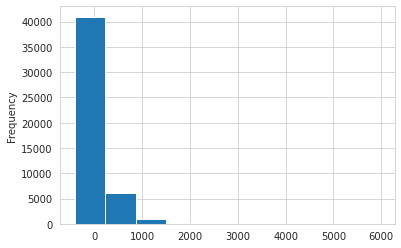

In [12]:
df.Quantity.plot(kind='hist')

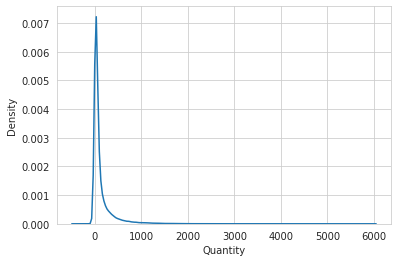

In [13]:
sns.kdeplot(data=df, x="Quantity")

In [14]:
conInt = lambda x : int(x) 
df['Period'] = df['Period'].apply(conInt)
df['Period2'] = df['Period']
df = df[df['Quantity'] > 0]
df.head(10)

,Year,Period,Product,Province,Quantity,Period2
0,2017,201701,PRODUCT_A,ANKARA,16,201701
1,2017,201701,PRODUCT_A,ANKARA,25,201701
2,2017,201701,PRODUCT_A,ANKARA,56,201701
3,2017,201701,PRODUCT_A,ANKARA,16,201701
4,2017,201701,PRODUCT_A,ADANA,11,201701
5,2017,201701,PRODUCT_A,ADANA,25,201701
6,2017,201701,PRODUCT_A,ANKARA,35,201701
7,2017,201701,PRODUCT_A,ADANA,54,201701
8,2017,201701,PRODUCT_A,ADANA,17,201701
9,2017,201701,PRODUCT_A,ADANA,30,201701


In [15]:
df.Period.unique()

array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201711,
       201801, 201708, 201804, 201802, 201709, 201712, 201805, 201803,
       201710, 201806, 201811, 201809, 201807, 201812, 201902, 201810,
       201901, 201903, 201808, 201904, 201905, 201907, 201910, 201908,
       201906, 201911, 201909, 201912])

In [16]:
count_df=pd.DataFrame(df.groupby(["Period","Product"])["Quantity"].count()).reset_index().rename(columns={'Quantity': 'Sale_count'})
count_df.head(10)

,Period,Product,Sale_count
0,201701,PRODUCT_A,464
1,201701,PRODUCT_B,499
2,201701,PRODUCT_C,401
3,201701,PRODUCT_V,45
4,201701,PRODUCT_X,80
5,201702,PRODUCT_A,467
6,201702,PRODUCT_B,499
7,201702,PRODUCT_C,394
8,201702,PRODUCT_V,48
9,201702,PRODUCT_X,81


In [17]:
df = pd.merge(df,count_df,how='left',on=['Period',"Product"])
df.head()

,Year,Period,Product,Province,Quantity,Period2,Sale_count
0,2017,201701,PRODUCT_A,ANKARA,16,201701,464
1,2017,201701,PRODUCT_A,ANKARA,25,201701,464
2,2017,201701,PRODUCT_A,ANKARA,56,201701,464
3,2017,201701,PRODUCT_A,ANKARA,16,201701,464
4,2017,201701,PRODUCT_A,ADANA,11,201701,464


In [18]:
quantity_df=pd.DataFrame(df.groupby(["Period","Product"])["Quantity"].sum()).reset_index().rename(columns={'Quantity': 'Total_Quantity'})
quantity_df.head()

,Period,Product,Total_Quantity
0,201701,PRODUCT_A,12292
1,201701,PRODUCT_B,153352
2,201701,PRODUCT_C,29750
3,201701,PRODUCT_V,4919
4,201701,PRODUCT_X,19375


In [19]:
df = pd.merge(df,quantity_df,how='left',on=['Period',"Product"])
df.head()

,Year,Period,Product,Province,Quantity,Period2,Sale_count,Total_Quantity
0,2017,201701,PRODUCT_A,ANKARA,16,201701,464,12292
1,2017,201701,PRODUCT_A,ANKARA,25,201701,464,12292
2,2017,201701,PRODUCT_A,ANKARA,56,201701,464,12292
3,2017,201701,PRODUCT_A,ANKARA,16,201701,464,12292
4,2017,201701,PRODUCT_A,ADANA,11,201701,464,12292


In [20]:
df=df.drop_duplicates(subset = ["Period","Product"]).reset_index().drop(["index","Province","Quantity"],axis=1)
df

,Year,Period,Product,Period2,Sale_count,Total_Quantity
0,2017,201701,PRODUCT_A,201701,464,12292
1,2017,201702,PRODUCT_A,201702,467,11587
2,2017,201703,PRODUCT_A,201703,475,12040
3,2017,201704,PRODUCT_A,201704,465,10902
4,2017,201705,PRODUCT_A,201705,475,12201
...,...,...,...,...,...,...
175,2019,201908,PRODUCT_X,201908,81,9390
176,2019,201909,PRODUCT_X,201909,62,1025
177,2019,201910,PRODUCT_X,201910,82,24762
178,2019,201911,PRODUCT_X,201911,82,20978


In [21]:
df.sort_values("Period").head(10)

,Year,Period,Product,Period2,Sale_count,Total_Quantity
0,2017,201701,PRODUCT_A,201701,464,12292
36,2017,201701,PRODUCT_B,201701,499,153352
144,2017,201701,PRODUCT_X,201701,80,19375
108,2017,201701,PRODUCT_V,201701,45,4919
72,2017,201701,PRODUCT_C,201701,401,29750
37,2017,201702,PRODUCT_B,201702,499,150342
145,2017,201702,PRODUCT_X,201702,81,18863
73,2017,201702,PRODUCT_C,201702,394,23777
109,2017,201702,PRODUCT_V,201702,48,11661
1,2017,201702,PRODUCT_A,201702,467,11587


**Adding external data,the inflation information monthly and annual from TC. Merkez Bankası.**

**Source Link:https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Istatistikler/Enflasyon+Verileri/Tuketici+Fiyatlari**

In [22]:
enf = pd.read_table('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/Enf.txt')
#enf= pd.read_table("/content/Enf.txt")
enf.rename(columns={'Tarih ': 'Period','TUFE-(Yillik%Degisim)':'TUFE_Annual_Change', 'TUFE-(Aylik%Degisim)':'TUFE_Monthly_Change'},inplace=True)
def new_date(x):
  a=str(x)
  b=a[3:]+a[:2]
  return b
enf['Period'] = enf['Period'].apply(new_date)
enf['Period'] = enf['Period'].apply(conInt)

In [23]:
enf.head()

,Period,TUFE_Annual_Change,TUFE_Monthly_Change
0,202108,19.25,1.12
1,202107,18.95,1.80
2,202106,17.53,1.94
3,202105,16.59,0.89
4,202104,17.14,1.68


In [24]:
enf.Period.unique()

array([202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501,
       201412, 201411, 201410, 201409, 201408, 201407, 201406, 201405,
       201404, 201403, 201402, 201401, 201312, 201311, 201310, 201309,
       201308, 201307, 201306, 201305, 201304, 201303, 201302, 201301,
       201212, 201211, 201210, 201209, 201208, 201207, 201206, 201205,
      

In [25]:
df.isna().sum()

Year              0
Period            0
Product           0
Period2           0
Sale_count        0
Total_Quantity    0
dtype: int64

In [26]:
df = pd.merge(df,enf,how='left',on='Period')
df.isna().sum()

Year                   0
Period                 0
Product                0
Period2                0
Sale_count             0
Total_Quantity         0
TUFE_Annual_Change     0
TUFE_Monthly_Change    0
dtype: int64

In [27]:
df.shape

(180, 8)

In [28]:
df.head()

,Year,Period,Product,Period2,Sale_count,Total_Quantity,TUFE_Annual_Change,TUFE_Monthly_Change
0,2017,201701,PRODUCT_A,201701,464,12292,9.22,2.46
1,2017,201702,PRODUCT_A,201702,467,11587,10.13,0.81
2,2017,201703,PRODUCT_A,201703,475,12040,11.29,1.02
3,2017,201704,PRODUCT_A,201704,465,10902,11.87,1.31
4,2017,201705,PRODUCT_A,201705,475,12201,11.72,0.45


**Adding external data,the USD-TL currency monthly information from TC. Merkez Bankası.**

**Source Link:https://www.tcmb.gov.tr/wps/wcm/connect/tr/tcmb+tr/main+menu/istatistikler/doviz+kurlari/reel+efektif+doviz+kuruu**

In [29]:
"""Adding external data,the USD-TL currency monthly information from TC. Merkez Bankası.

Source Link:https://www.tcmb.gov.tr/wps/wcm/connect/tr/tcmb+tr/main+menu/istatistikler/doviz+kurlari/reel+efektif+doviz+kuruu"""

kur = pd.read_excel('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/Kur.xlsx')
#kur = pd.read_excel("/content/Kur.xlsx")
df = pd.merge(df,kur,how='left',on='Period')

In [30]:
df.head()

,Year,Period,Product,Period2,Sale_count,Total_Quantity,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL
0,2017,201701,PRODUCT_A,201701,464,12292,9.22,2.46,3.741614
1,2017,201702,PRODUCT_A,201702,467,11587,10.13,0.81,3.678985
2,2017,201703,PRODUCT_A,201703,475,12040,11.29,1.02,3.672548
3,2017,201704,PRODUCT_A,201704,465,10902,11.87,1.31,3.660400
4,2017,201705,PRODUCT_A,201705,475,12201,11.72,0.45,3.570271


In [31]:
df.shape

(180, 9)

In [32]:
df['Year'] = df['Year'].astype(np.int64)
df['Total_Quantity'] = df['Total_Quantity'].astype(np.int64)
df['Period2'] = df['Period2'].astype(np.int64)


df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')
df['Month'] = df.Period.dt.month

def seasonality(x):
  if x in(12,1,2):
    return "winter"
  elif x in (3,4,5):
    return "spring"
  elif x in(6,7,8):
    return "summer"
  else:
    return "autumn"
df["Season"]=df["Month"].apply(seasonality)

In [33]:
df["Product"]=df["Product"].str.split("_",expand=True)[1]

def TotalAmountQuantityDistribution(x):
  if x == 'B':
    return 5
  elif x == "X":
    return 4
  elif x == "A":
    return 3
  elif x == "C":
    return 2
  else:
    return 1
df['Total_Sale_Volume'] = df['Product'].apply(TotalAmountQuantityDistribution)

In [34]:
df.isna().sum()

Year                   0
Period                 0
Product                0
Period2                0
Sale_count             0
Total_Quantity         0
TUFE_Annual_Change     0
TUFE_Monthly_Change    0
USD-TL                 0
Month                  0
Season                 0
Total_Sale_Volume      0
dtype: int64

In [35]:
df.shape

(180, 12)

In [36]:
df.head()

,Year,Period,Product,Period2,Sale_count,Total_Quantity,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL,Month,Season,Total_Sale_Volume
0,2017,2017-01-01,A,201701,464,12292,9.22,2.46,3.741614,1,winter,3
1,2017,2017-02-01,A,201702,467,11587,10.13,0.81,3.678985,2,winter,3
2,2017,2017-03-01,A,201703,475,12040,11.29,1.02,3.672548,3,spring,3
3,2017,2017-04-01,A,201704,465,10902,11.87,1.31,3.660400,4,spring,3
4,2017,2017-05-01,A,201705,475,12201,11.72,0.45,3.570271,5,spring,3


In [37]:
df.sort_values(by="Period",ascending=True,inplace = True)

In [38]:
for prod in df.Product.unique():
  for period in df.Period.unique():
   df.loc[df.Product==prod,'Quantity_M3']= df.loc[df.Product==prod,'Total_Quantity'].shift(3)
   df.loc[df.Product==prod,'Quantity_M6']= df.loc[df.Product==prod,'Total_Quantity'].shift(6)
   df.loc[df.Product==prod,'Quantity_M9']= df.loc[df.Product==prod,'Total_Quantity'].shift(9)
   df.loc[df.Product==prod,'Quantity_M12']= df.loc[df.Product==prod,'Total_Quantity'].shift(12)

In [39]:
df

,Year,Period,Product,Period2,Sale_count,Total_Quantity,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL,Month,Season,Total_Sale_Volume,Quantity_M3,Quantity_M6,Quantity_M9,Quantity_M12
0,2017,2017-01-01,A,201701,464,12292,9.22,2.46,3.741614,1,winter,3,NaN,NaN,NaN,NaN
36,2017,2017-01-01,B,201701,499,153352,9.22,2.46,3.741614,1,winter,5,NaN,NaN,NaN,NaN
144,2017,2017-01-01,X,201701,80,19375,9.22,2.46,3.741614,1,winter,4,NaN,NaN,NaN,NaN
108,2017,2017-01-01,V,201701,45,4919,9.22,2.46,3.741614,1,winter,1,NaN,NaN,NaN,NaN
72,2017,2017-01-01,C,201701,401,29750,9.22,2.46,3.741614,1,winter,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019,2019-12-01,A,201912,486,19420,11.84,0.74,5.848150,12,winter,3,14335.0,16188.0,26724.0,18730.0
71,2019,2019-12-01,B,201912,495,50360,11.84,0.74,5.848150,12,winter,5,77268.0,70620.0,125212.0,94153.0
143,2019,2019-12-01,V,201912,43,5048,11.84,0.74,5.848150,12,winter,1,12211.0,6411.0,17476.0,3782.0
107,2019,2019-12-01,C,201912,291,19549,11.84,0.74,5.848150,12,winter,2,13667.0,7177.0,9607.0,192.0


In [40]:
df.fillna(df.mean(),inplace=True)

In [41]:
df[df.Product=="A"]

,Year,Period,Product,Period2,Sale_count,Total_Quantity,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL,Month,Season,Total_Sale_Volume,Quantity_M3,Quantity_M6,Quantity_M9,Quantity_M12
0,2017,2017-01-01,A,201701,464,12292,9.22,2.46,3.741614,1,winter,3,35629.533333,36850.9,37816.688889,38136.75
1,2017,2017-02-01,A,201702,467,11587,10.13,0.81,3.678985,2,winter,3,35629.533333,36850.9,37816.688889,38136.75
2,2017,2017-03-01,A,201703,475,12040,11.29,1.02,3.672548,3,spring,3,35629.533333,36850.9,37816.688889,38136.75
3,2017,2017-04-01,A,201704,465,10902,11.87,1.31,3.660400,4,spring,3,12292.000000,36850.9,37816.688889,38136.75
4,2017,2017-05-01,A,201705,475,12201,11.72,0.45,3.570271,5,spring,3,11587.000000,36850.9,37816.688889,38136.75
5,2017,2017-06-01,A,201706,477,11453,10.90,-0.27,3.525340,6,summer,3,12040.000000,36850.9,37816.688889,38136.75
6,2017,2017-07-01,A,201707,470,12224,9.79,0.15,3.566281,7,summer,3,10902.000000,12292.0,37816.688889,38136.75
9,2017,2017-08-01,A,201708,473,12314,10.68,0.52,3.518800,8,summer,3,12201.000000,11587.0,37816.688889,38136.75
12,2017,2017-09-01,A,201709,481,14241,11.20,0.65,3.474295,9,autumn,3,11453.000000,12040.0,37816.688889,38136.75
16,2017,2017-10-01,A,201710,478,13259,11.90,2.08,3.668873,10,autumn,3,12224.000000,10902.0,12292.000000,38136.75


# **Visualization**

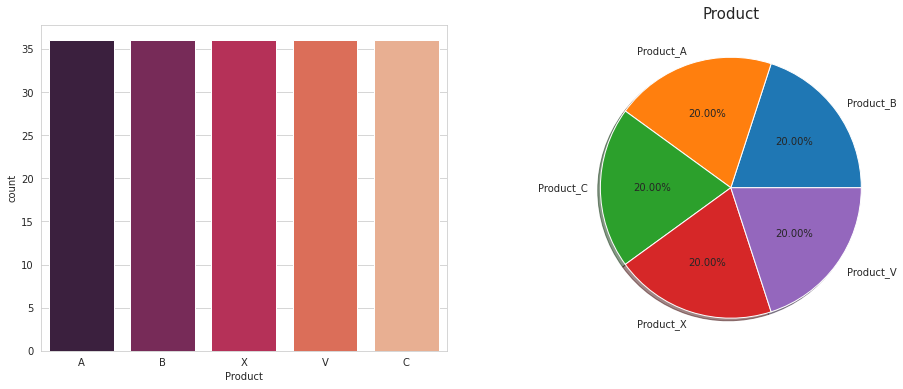

In [42]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Product', data=df,palette="rocket")

plt.subplot(1, 2, 2)
plt.pie(df['Product'].value_counts(), autopct='%1.2f%%', shadow=True,labels=["Product_B","Product_A","Product_C","Product_X","Product_V"])#, explode=[0, 0.05],colors=["lightcoral","lightskyblue"])
plt.title('Product', fontsize=15)

plt.show()

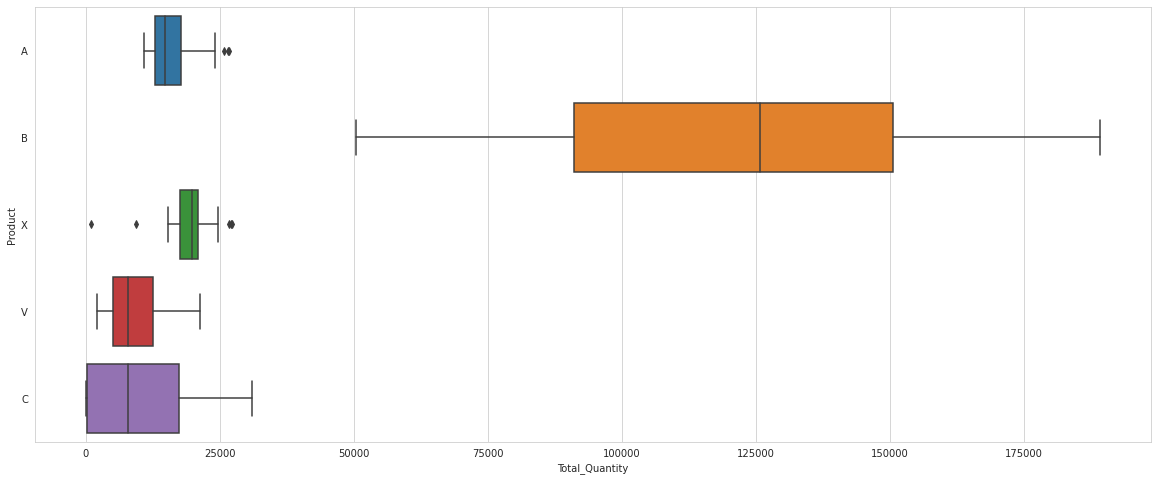

In [43]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Total_Quantity",y="Product",data=df)
plt.show()

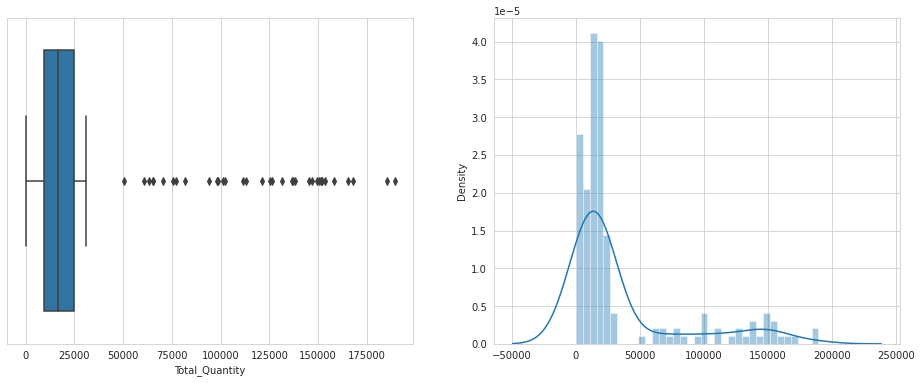

In [44]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Total_Quantity",data=df)

plt.subplot(1, 2, 2)
sns.distplot(x=df["Total_Quantity"])

plt.show()

In [45]:
df.groupby("Product")["Total_Quantity"].mean() #ürün tipine göre miktarların ortalaması

Product
A     16031.500000
B    119751.527778
C      9757.666667
V      9043.694444
X     19357.972222
Name: Total_Quantity, dtype: float64

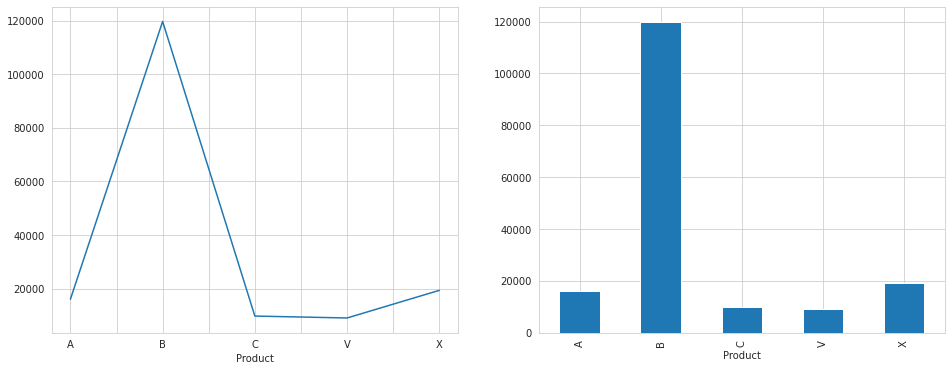

In [46]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby("Product")["Total_Quantity"].mean().plot()

plt.subplot(1, 2, 2)
df.groupby("Product")["Total_Quantity"].mean().plot(kind="bar")

plt.show()

In [47]:
df.groupby("Year")["Total_Quantity"].mean() #yıla göre miktarlar

Year
2017    43004.300000
2018    33269.200000
2019    28091.916667
Name: Total_Quantity, dtype: float64

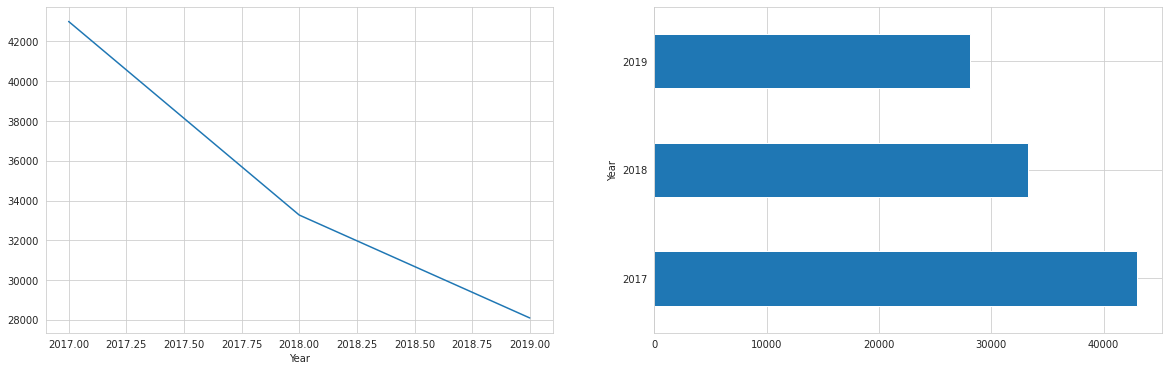

In [48]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
df.groupby("Year")["Total_Quantity"].mean().plot(figsize=(20,6))

plt.subplot(1, 2, 2)
df.groupby("Year")["Total_Quantity"].mean().plot(kind="barh",figsize=(20,6))
plt.show()

In [49]:
df.pivot_table(index=["Year"],columns=["Product",],aggfunc={"Total_Quantity":"mean"})

Total_Quantity                                                         
Product              A              B             C             V             X
Year                                                                           
2017           12428.5  153624.166667  19107.250000  11432.750000  18428.833333
2018           15357.5  124620.500000    231.916667   7163.750000  18972.333333
2019           20308.5   81009.916667   9933.833333   8534.583333  20672.750000

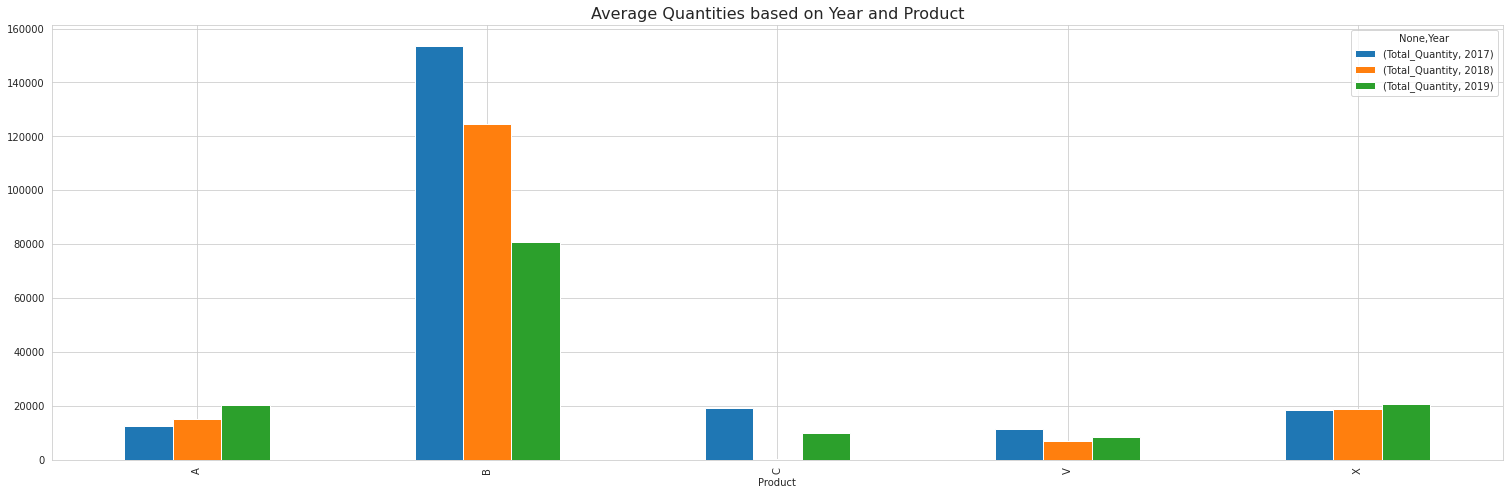

In [50]:
ax = df.pivot_table(index=["Product"],columns=["Year",],aggfunc={"Total_Quantity":"mean"}).plot(kind="bar",figsize=(26,8))
plt.title('Average Quantities based on Year and Product', fontsize=16)
plt.show()

In [51]:
df.pivot_table(index=["Year"],columns=["Product",],aggfunc={"Total_Quantity":"sum"}) 

Total_Quantity                                 
Product              A        B       C       V       X
Year                                                   
2017            149142  1843490  229287  137193  221146
2018            184290  1495446    2783   85965  227668
2019            243702   972119  119206  102415  248073

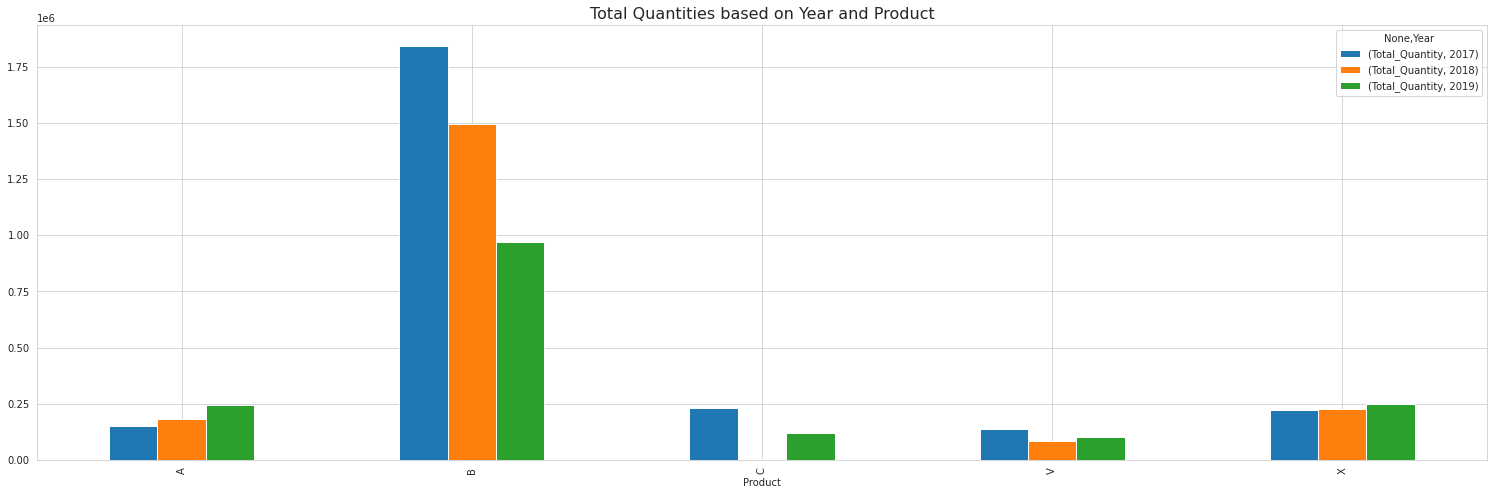

In [52]:
ax = df.pivot_table(index=["Product"],columns=["Year",],aggfunc={"Total_Quantity":"sum"}).plot(kind="bar",figsize=(26,8))
plt.title('Total Quantities based on Year and Product', fontsize=16)
plt.show()

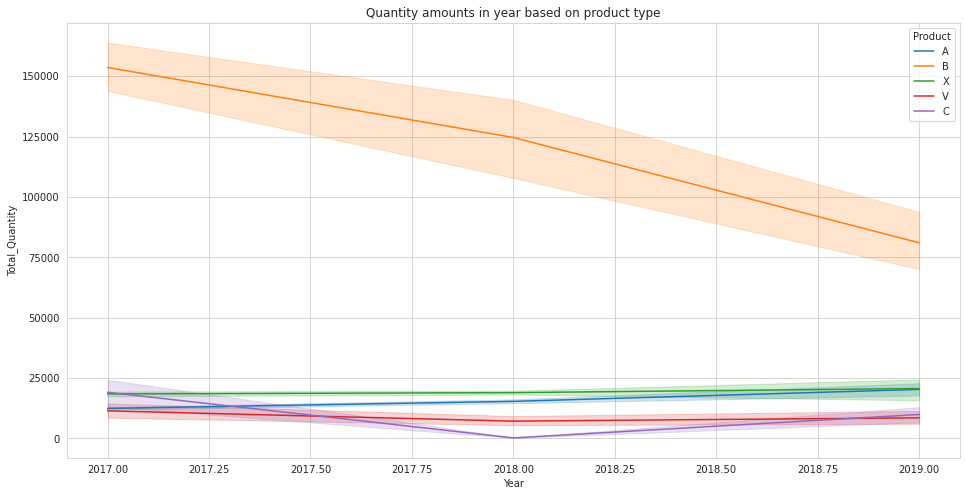

In [53]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Year"],y=df["Total_Quantity"],hue=df["Product"])
plt.title("Quantity amounts in year based on product type")
plt.show()

In [54]:
df.groupby('Product').Total_Quantity.agg(['sum','count', 'mean', 'min', 'max'])

,sum,count,mean,min,max
Product,,,,,
A,577134,36,16031.500000,10902,26724
B,4311055,36,119751.527778,50360,189235
C,351276,36,9757.666667,25,31106
V,325573,36,9043.694444,2102,21400
X,696887,36,19357.972222,1025,27268


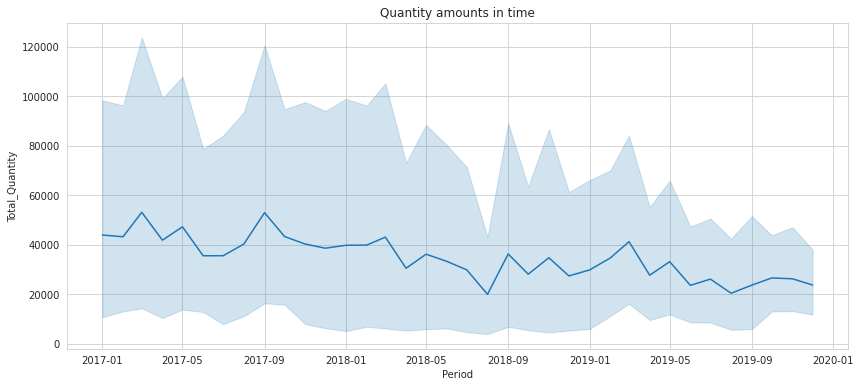

In [55]:
plt.figure(figsize=(14,6))
sns.lineplot(x=df["Period"],y=df["Total_Quantity"])
plt.title("Quantity amounts in time")
plt.show()

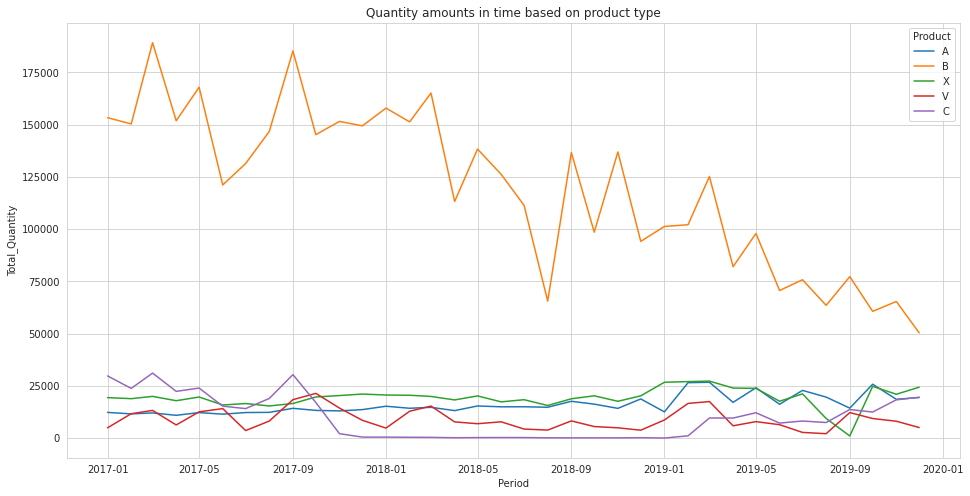

In [56]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Period"],y=df["Total_Quantity"],hue=df["Product"])
plt.title("Quantity amounts in time based on product type")
plt.show()

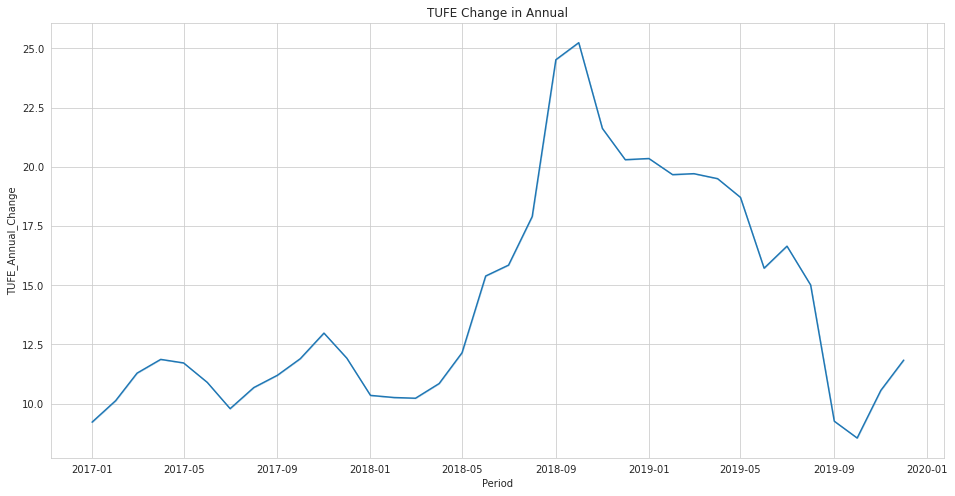

In [57]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Period"],y=df["TUFE_Annual_Change"])
plt.title("TUFE Change in Annual")
plt.show()

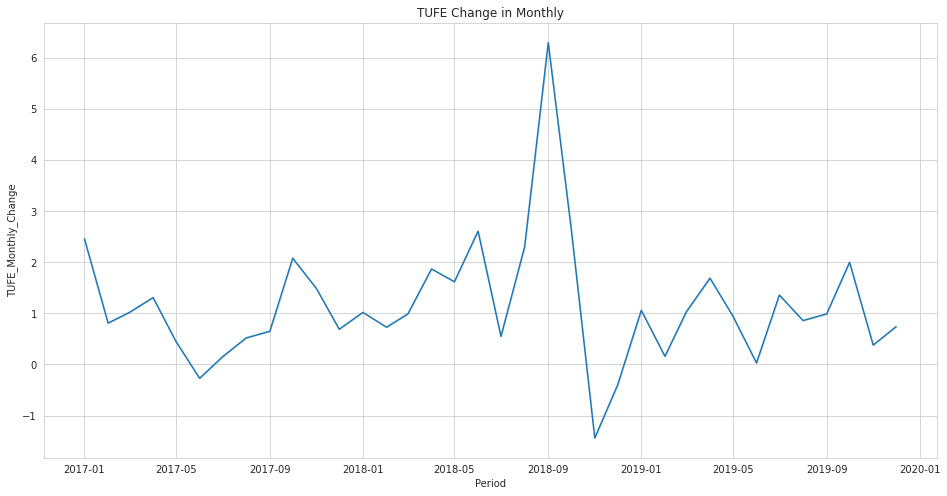

In [58]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Period"],y=df["TUFE_Monthly_Change"])
plt.title("TUFE Change in Monthly")
plt.show()

In [59]:
df_17_18=pd.DataFrame({"2017_Average":df[df.Year==2017].groupby("Product")["Total_Quantity"].mean(),"2018_Average":df[df.Year==2018].groupby("Product")["Total_Quantity"].mean()}).reset_index()
df_17_18

,Product,2017_Average,2018_Average
0,A,12428.500000,15357.500000
1,B,153624.166667,124620.500000
2,C,19107.250000,231.916667
3,V,11432.750000,7163.750000
4,X,18428.833333,18972.333333


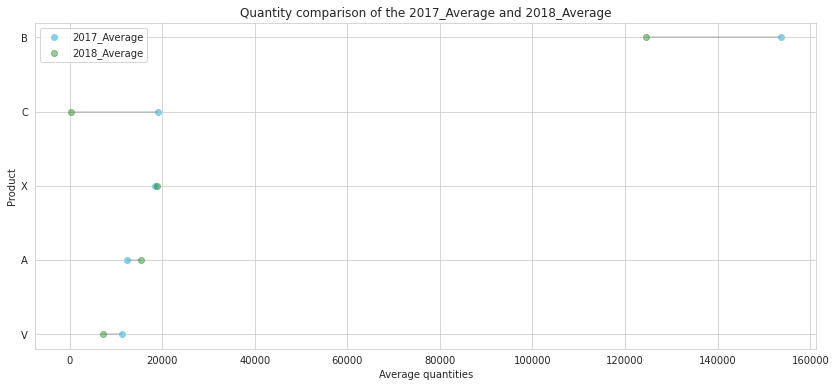

In [60]:
#Lollipop Graph
plt.figure(figsize=(14,6))
ordered_df = df_17_18.sort_values(by='2017_Average')
my_range=range(1,len(df_17_18.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['2017_Average'], xmax=ordered_df['2018_Average'], color='grey', alpha=0.4)
plt.scatter(ordered_df['2017_Average'], my_range, color='skyblue', alpha=1, label='2017_Average')
plt.scatter(ordered_df['2018_Average'], my_range, color='green', alpha=0.4 , label='2018_Average')
plt.legend()

plt.yticks(my_range, ordered_df['Product'])
plt.title("Quantity comparison of the 2017_Average and 2018_Average")
plt.xlabel('Average quantities')
plt.ylabel('Product')

plt.show()

In [61]:
df_17_19=pd.DataFrame({"2017_Average":df[df.Year==2017].groupby("Product")["Total_Quantity"].mean(),"2019_Average":df[df.Year==2019].groupby("Product")["Total_Quantity"].mean()}).reset_index()
df_17_19

,Product,2017_Average,2019_Average
0,A,12428.500000,20308.500000
1,B,153624.166667,81009.916667
2,C,19107.250000,9933.833333
3,V,11432.750000,8534.583333
4,X,18428.833333,20672.750000


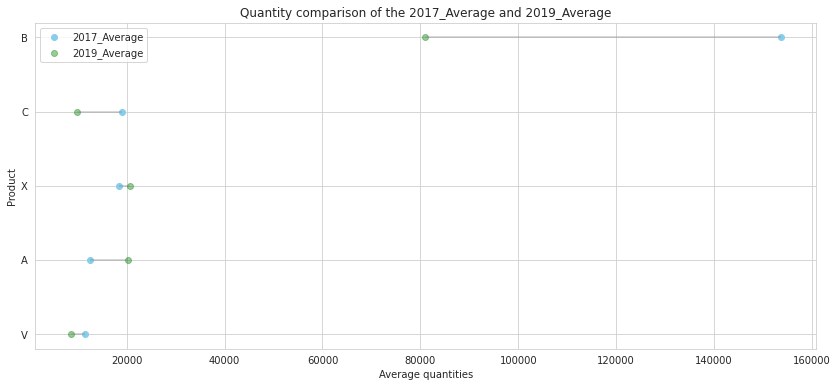

In [62]:
#Lollipop Graph
plt.figure(figsize=(14,6))
ordered_df = df_17_19.sort_values(by='2017_Average')
my_range=range(1,len(df_17_19.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['2017_Average'], xmax=ordered_df['2019_Average'], color='grey', alpha=0.4)
plt.scatter(ordered_df['2017_Average'], my_range, color='skyblue', alpha=1, label='2017_Average')
plt.scatter(ordered_df['2019_Average'], my_range, color='green', alpha=0.4 , label='2019_Average')
plt.legend()

plt.yticks(my_range, ordered_df['Product'])
plt.title("Quantity comparison of the 2017_Average and 2019_Average")
plt.xlabel('Average quantities')
plt.ylabel('Product')

plt.show()

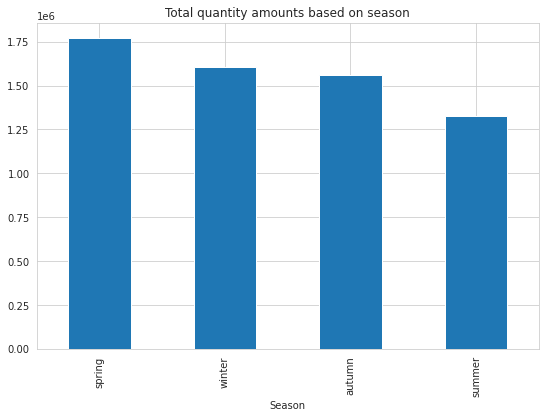

In [63]:
df.groupby("Season")["Total_Quantity"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(9,6))
plt.title("Total quantity amounts based on season")
plt.show()

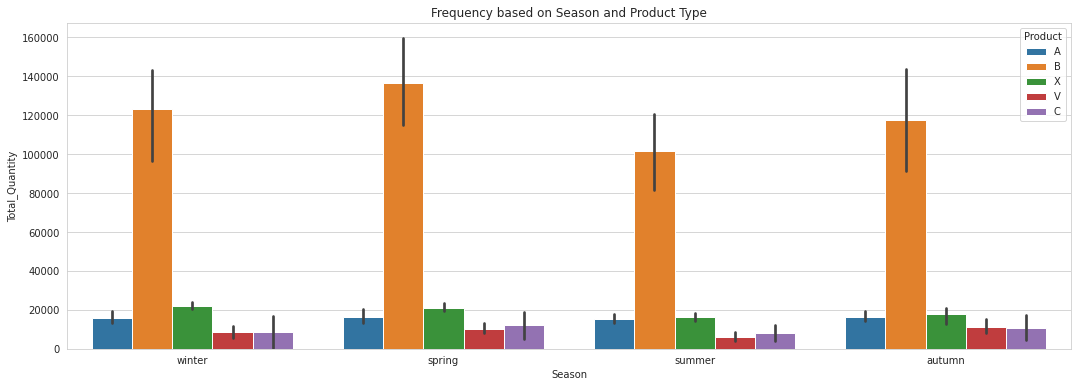

In [64]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Season"],y=df["Total_Quantity"],hue=df.Product)
plt.title("Frequency based on Season and Product Type")
plt.show()

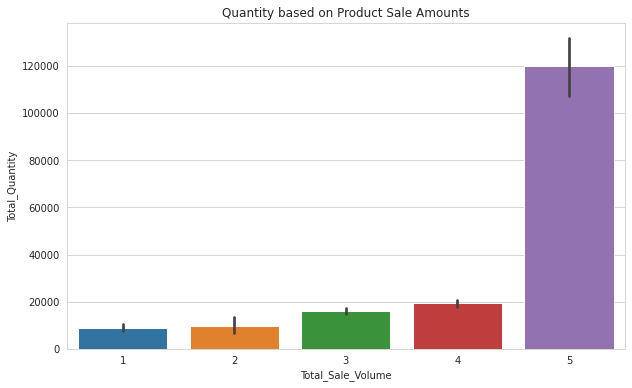

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Total_Sale_Volume"],y=df["Total_Quantity"])
plt.title("Quantity based on Product Sale Amounts")
plt.show()

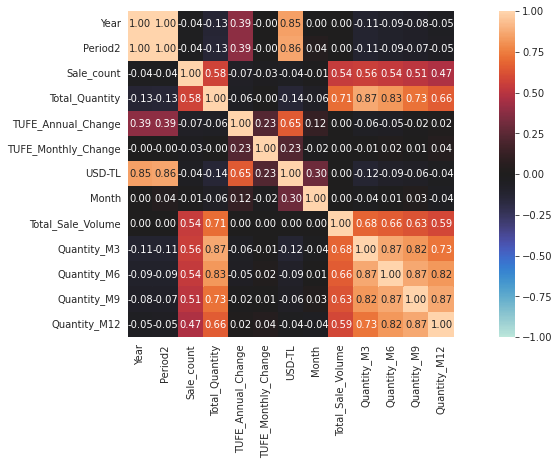

In [66]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,square=True,annot=True,fmt='.2f',)

# **Target Outlier Elimination**

Since minus values of quantity feature represent refund info, we should deal with them before building ML model.

In [67]:
df.Total_Quantity.describe()

count       180.000000
mean      34788.472222
std       46329.825799
min          25.000000
25%        9540.000000
50%       16574.000000
75%       25016.750000
max      189235.000000
Name: Total_Quantity, dtype: float64

In [68]:
df.Total_Quantity.skew(),df.Total_Quantity.kurtosis()

(1.8620578087346984, 2.1725275287989296)

In [69]:
df = df[df['Total_Quantity'] > 0]

In [70]:
df['Total_Quantity'] = np.log10(df['Total_Quantity']) # since target quantity is highly skewed, appylinglog10 transform to the target.

In [71]:
df.shape

(180, 16)

# **Model Building**

In [72]:
df=df.reset_index().drop("index",axis=1)
df

,Year,Period,Product,Period2,Sale_count,Total_Quantity,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL,Month,Season,Total_Sale_Volume,Quantity_M3,Quantity_M6,Quantity_M9,Quantity_M12
0,2017,2017-01-01,A,201701,464,4.089623,9.22,2.46,3.741614,1,winter,3,35629.533333,36850.9,37816.688889,38136.75
1,2017,2017-01-01,B,201701,499,5.185689,9.22,2.46,3.741614,1,winter,5,35629.533333,36850.9,37816.688889,38136.75
2,2017,2017-01-01,X,201701,80,4.287242,9.22,2.46,3.741614,1,winter,4,35629.533333,36850.9,37816.688889,38136.75
3,2017,2017-01-01,V,201701,45,3.691877,9.22,2.46,3.741614,1,winter,1,35629.533333,36850.9,37816.688889,38136.75
4,2017,2017-01-01,C,201701,401,4.473487,9.22,2.46,3.741614,1,winter,2,35629.533333,36850.9,37816.688889,38136.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2019,2019-12-01,A,201912,486,4.288249,11.84,0.74,5.848150,12,winter,3,14335.000000,16188.0,26724.000000,18730.00
176,2019,2019-12-01,B,201912,495,4.702086,11.84,0.74,5.848150,12,winter,5,77268.000000,70620.0,125212.000000,94153.00
177,2019,2019-12-01,V,201912,43,3.703119,11.84,0.74,5.848150,12,winter,1,12211.000000,6411.0,17476.000000,3782.00
178,2019,2019-12-01,C,201912,291,4.291125,11.84,0.74,5.848150,12,winter,2,13667.000000,7177.0,9607.000000,192.00


In [73]:
df.fillna(df.mean(),inplace=True)

X = pd.concat([pd.get_dummies(df[["Season","Product"]],drop_first=True),df[["USD-TL","Quantity_M9","Quantity_M12",'Quantity_M6','Quantity_M3',"TUFE_Annual_Change","TUFE_Monthly_Change","Sale_count","Total_Sale_Volume"]]],axis=1)
y = df['Total_Quantity']
X.head()

,Season_spring,Season_summer,Season_winter,Product_B,Product_C,Product_V,Product_X,USD-TL,Quantity_M9,Quantity_M12,Quantity_M6,Quantity_M3,TUFE_Annual_Change,TUFE_Monthly_Change,Sale_count,Total_Sale_Volume
0,0,0,1,0,0,0,0,3.741614,37816.688889,38136.75,36850.9,35629.533333,9.22,2.46,464,3
1,0,0,1,1,0,0,0,3.741614,37816.688889,38136.75,36850.9,35629.533333,9.22,2.46,499,5
2,0,0,1,0,0,0,1,3.741614,37816.688889,38136.75,36850.9,35629.533333,9.22,2.46,80,4
3,0,0,1,0,0,1,0,3.741614,37816.688889,38136.75,36850.9,35629.533333,9.22,2.46,45,1
4,0,0,1,0,1,0,0,3.741614,37816.688889,38136.75,36850.9,35629.533333,9.22,2.46,401,2


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)

In [75]:
X_test.shape

(54, 16)

In [76]:
y_test=10**y_test

# **Non-Linear Models**

In [77]:
!pip install catboost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor


categorical_features_indices = np.where(X.dtypes != np.float)[0]


catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)


pred = catb_model.predict(X_test)
pred=10**pred

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))



Learning rate set to 0.026994
0:	learn: 0.7228404	total: 48.6ms	remaining: 48.6s
1:	learn: 0.7155360	total: 50.1ms	remaining: 25s
2:	learn: 0.7047804	total: 51.3ms	remaining: 17s
3:	learn: 0.6928613	total: 52.3ms	remaining: 13s
4:	learn: 0.6822507	total: 53.3ms	remaining: 10.6s
5:	learn: 0.6737098	total: 54.6ms	remaining: 9.05s
6:	learn: 0.6645354	total: 56ms	remaining: 7.94s
7:	learn: 0.6552510	total: 57ms	remaining: 7.07s
8:	learn: 0.6463099	total: 58ms	remaining: 6.38s
9:	learn: 0.6379128	total: 59ms	remaining: 5.84s
10:	learn: 0.6292432	total: 60.1ms	remaining: 5.4s
11:	learn: 0.6201836	total: 61.1ms	remaining: 5.03s
12:	learn: 0.6113431	total: 62.3ms	remaining: 4.73s
13:	learn: 0.6039822	total: 63.5ms	remaining: 4.47s
14:	learn: 0.5946479	total: 64.8ms	remaining: 4.25s
15:	learn: 0.5865862	total: 65.9ms	remaining: 4.05s
16:	learn: 0.5797948	total: 66.5ms	remaining: 3.85s
17:	learn: 0.5704137	total: 67.5ms	remaining: 3.68s
18:	learn: 0.5635948	total: 68.6ms	remaining: 3.54s
19:	lea

In [78]:
#CoV=RMSE/mean(target)
CoV_CTB = (np.sqrt(metrics.mean_squared_error(y_test, pred))) / y_test.mean()
CoV_CTB 
# CoVMean_CTB = sum(CoV_CTB)/len(CoV_CTB)  # CoV mean = sum/length
# CoVMean_CTB

0.4298621617340408

In [79]:
from xgboost import XGBRegressor
XGBMODEL = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 6, n_estimators= 500, cv = 10)
XGBMODEL.fit(X_train, y_train)
pred2 = XGBMODEL.predict(X_test)
pred2=10**pred2

print("R^2:",metrics.r2_score(y_test, pred2))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred2))
print("MSE:",metrics.mean_squared_error(y_test, pred2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred2)))

[15:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2: 0.8993414567936677
Adjusted R^2: 0.8558134381098483
MAE: 8514.119286431209
MSE: 205039721.9545868
RMSE: 14319.208146911853


In [80]:
#CoV=RMSE/mean(target)
CoV_XGB = (np.sqrt(metrics.mean_squared_error(y_test, pred2))) / y_test.mean()
CoV_XGB

0.3992593712913911

In [81]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,  pred2)

0.9018806537213654

**The Importances of the features, According to XGBoost Model**

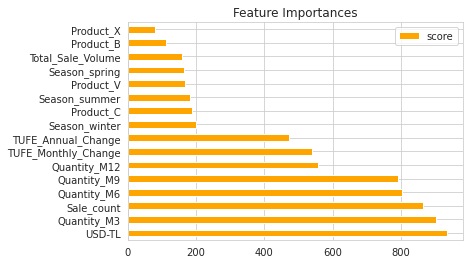

In [82]:
feature_important = XGBMODEL.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',title='Feature Importances',color= 'orange')


In [83]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)
pred3 = knn_model.predict(X_test)
pred3=10**pred3

print("R^2:",metrics.r2_score(y_test, pred3))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred3))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred3))
print("MSE:",metrics.mean_squared_error(y_test, pred3))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred3)))

R^2: 0.7910707976015545
Adjusted R^2: 0.7007230344022267
MAE: 13046.413167593579
MSE: 425585193.3020619
RMSE: 20629.71626809399


In [84]:
#CoV=RMSE/mean(target)
CoV_KNN = (np.sqrt(metrics.mean_squared_error(y_test, pred3))) / y_test.mean()
CoV_KNN

0.5752138988841596

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
pred6 = gbm_model.predict(X_test)
pred6=10**pred6

print("R^2:",metrics.r2_score(y_test, pred6))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred6))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred6))
print("MSE:",metrics.mean_squared_error(y_test, pred6))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred6)))

R^2: 0.903363414376439
Adjusted R^2: 0.8615746205932775
MAE: 8148.507465554412
MSE: 196847063.50537658
RMSE: 14030.219652784363


In [86]:
#CoV=RMSE/mean(target)
CoV_GBM = (np.sqrt(metrics.mean_squared_error(y_test, pred6))) / y_test.mean()
CoV_GBM

0.39120156786455346

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 2021)
rf_model.fit(X_train, y_train)
pred5 = rf_model.predict(X_test)
pred5=10**pred5

print("R^2:",metrics.r2_score(y_test, pred5))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred5))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred5))
print("MSE:",metrics.mean_squared_error(y_test, pred5))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred5)))

R^2: 0.9199245031248309
Adjusted R^2: 0.8852972612328658
MAE: 7926.682992461418
MSE: 163112410.44890475
RMSE: 12771.546909004592


In [88]:
#CoV=RMSE/mean(target)
CoV_RF = (np.sqrt(metrics.mean_squared_error(y_test, pred5))) / y_test.mean()
CoV_RF

0.35610626907517867

# **Linear Models**

In [89]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Quantity   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           7.40e-59
Time:                        15:43:34   Log-Likelihood:                 34.510
No. Observations:                 126   AIC:                            -37.02
Df Residuals:                     110   BIC:                             8.360
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Season_spring           0.0608      0.052      1.178      0.242      -0.042       0.163
Season_summer          -0.0436      0.053     -0.827      0.410      -0.148       0.061
Season_winter          -0.0256      0.052     -0.489      0.626      -0.129       0.078
Product_B               0.2678      0.177      1.514      0.133      -0.083       0.618
Product_C               1.3639      0.065     21.003      0.000       1.235       1.493
Product_V               3.2767      0.087     37.627      0.000       3.104       3.449
Product_X               2.5321      0.182     13.929      0.000       2.172       2.892
USD-TL                  0.0051      0.025      0.209      0.835      -0.043       0.054
Quantity_M9         -3.521e-08   1.02e-06     -0.034      0.973   -2.06e-06    1.99e-06
Quantity_M12        -1.368e-06   8.73e-07     -1.567      0.120    -3.1e-06    3.62e-07
Quantity_M6         -2.866e-07   1.08e-06     -0.265      0.792   -2.43e-06    1.86e-06
Quantity_M3          2.301e-07   1.02e-06      0.227      0.821   -1.78e-06    2.24e-06
TUFE_Annual_Change     -0.0018      0.005     -0.355      0.723      -0.012       0.008
TUFE_Monthly_Change     0.0003      0.015      0.018      0.985      -0.030       0.031
Sale_count              0.0070      0.000     23.677      0.000       0.006       0.008
Total_Sale_Volume       0.2970      0.061      4.850      0.000       0.176       0.418
==============================================================================
Omnibus:                       75.673   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.588
Skew:                          -1.870   Prob(JB):                    2.87e-135
Kurtosis:                      13.199   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
pred11= model.predict(X_test)
pred11=10**pred11
print("R^2:",metrics.r2_score(y_test, pred11))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred11))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred11))
print("MSE:",metrics.mean_squared_error(y_test, pred11))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred11)))

R^2: 0.7488604625804403
Adjusted R^2: 0.6402595815341441
MAE: 12608.868313133995
MSE: 511566920.0452995
RMSE: 22617.845168037107


In [91]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,pred11)

0.7489655671443862

In [92]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test,pred11)

36.69219545169378

In [93]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MAPE:",mape(y_test,pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test, pred))) / y_test.mean()) #CoV=RMSE/mean(target)

R^2: 0.8833193498464186
Adjusted R^2: 0.8328628524827077
MAE: 8476.816048557752
MAPE: 47.540259057625704
MSE: 237676478.34849393
RMSE: 15416.759657868897
CoV: 0.4298621617340408


In [94]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha =0.3).fit(X_train, y_train)
pred7 = ridge_model.predict(X_test)
pred7=10**pred7

print("R^2:",metrics.r2_score(y_test, pred7))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred7))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred7))
print("MSE:",metrics.mean_squared_error(y_test, pred7))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred7)))

R^2: 0.7916234150948627
Adjusted R^2: 0.7015146216223709
MAE: 11976.329079268839
MSE: 424459520.9689857
RMSE: 20602.415415892032


In [95]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
pred8 = lasso_model.predict(X_test)
pred8=10**pred8

print("R^2:",metrics.r2_score(y_test, pred8))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred8))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred8))
print("MSE:",metrics.mean_squared_error(y_test, pred8))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred8)))

R^2: 0.7539471766060891
Adjusted R^2: 0.6475459556789925
MAE: 13673.145964133004
MSE: 501205371.0276108
RMSE: 22387.616465975352


In [96]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
pred9 = enet_model.predict(X_test)
pred9=10**pred9
print("R^2:",metrics.r2_score(y_test, pred9))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred9))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred9))
print("MSE:",metrics.mean_squared_error(y_test, pred9))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred9)))


R^2: 0.754976559398572
Adjusted R^2: 0.6490204769763328
MAE: 13371.479728658882
MSE: 499108535.9768306
RMSE: 22340.737140408564


In [97]:
mape(y_test,pred9)

168.24637224248474

In [98]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train, 10**y_train)
pred4 = mlp_model.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred4))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred4))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred4))
print("MSE:",metrics.mean_squared_error(y_test, pred4))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred4)))
#CoV=RMSE/mean(target)
CoV_MLP = (np.sqrt(metrics.mean_squared_error(y_test, pred4))) / y_test.mean()
CoV_MLP

R^2: 0.8549552509416545
Adjusted R^2: 0.7922331972948023
MAE: 11087.003670592645
MSE: 295453660.17203707
RMSE: 17188.765522050646


0.4792706164474003

In [99]:
mape(y_test,pred4)

157.60055089097878

# **Model Comparison**

In [100]:
RegModels={"CastBoost":[metrics.r2_score(y_test, pred),(1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred),mape(y_test,pred),metrics.mean_squared_error(y_test, pred),np.sqrt(metrics.mean_squared_error(y_test, pred))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred))) / y_test.mean(),explained_variance_score(y_test,  pred)],
         "XGBoost":[metrics.r2_score(y_test, pred2),(1 - (1-metrics.r2_score(y_test, pred2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred2),mape(y_test,pred2),metrics.mean_squared_error(y_test, pred2),np.sqrt(metrics.mean_squared_error(y_test, pred2))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred2))) / y_test.mean(),explained_variance_score(y_test,  pred2)],
         "KNN":[metrics.r2_score(y_test, pred3),(1 - (1-metrics.r2_score(y_test, pred3))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred3),mape(y_test,pred3),metrics.mean_squared_error(y_test, pred3),np.sqrt(metrics.mean_squared_error(y_test, pred3))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred3))) / y_test.mean(),explained_variance_score(y_test,  pred3)],
         "MLP":[metrics.r2_score(y_test, pred4),(1 - (1-metrics.r2_score(y_test, pred4))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred4),mape(y_test,pred4),metrics.mean_squared_error(y_test, pred4),np.sqrt(metrics.mean_squared_error(y_test, pred4))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred4))) / y_test.mean(),explained_variance_score(y_test,  pred4)],
         "RandomForest":[metrics.r2_score(y_test, pred5),(1 - (1-metrics.r2_score(y_test, pred5))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred5),mape(y_test,pred5),metrics.mean_squared_error(y_test, pred5),np.sqrt(metrics.mean_squared_error(y_test, pred5))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred5))) / y_test.mean(),explained_variance_score(y_test,  pred5)],
        "GradientBoosting" : [metrics.r2_score(y_test, pred6),(1 - (1-metrics.r2_score(y_test, pred6))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred6),mape(y_test,pred6),metrics.mean_squared_error(y_test, pred6),np.sqrt(metrics.mean_squared_error(y_test, pred6))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred6))) / y_test.mean(),explained_variance_score(y_test,  pred6)],
         'LinearRegression':[metrics.r2_score(y_test, pred11),(1 - (1-metrics.r2_score(y_test, pred11))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred11),mape(y_test,pred11),metrics.mean_squared_error(y_test, pred11),np.sqrt(metrics.mean_squared_error(y_test, pred11))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred11))) / y_test.mean(),explained_variance_score(y_test,  pred11)],
         'Ridge': [metrics.r2_score(y_test, pred7),(1 - (1-metrics.r2_score(y_test, pred7))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred7),mape(y_test,pred7),metrics.mean_squared_error(y_test, pred7),np.sqrt(metrics.mean_squared_error(y_test, pred7))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred7))) / y_test.mean(),explained_variance_score(y_test,  pred7)],
         'Lasso': [metrics.r2_score(y_test, pred8),(1 - (1-metrics.r2_score(y_test, pred8))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred8),mape(y_test,pred8),metrics.mean_squared_error(y_test, pred8),np.sqrt(metrics.mean_squared_error(y_test, pred8))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred8))) / y_test.mean(),explained_variance_score(y_test,  pred8)],
         "ElasticNet" : [metrics.r2_score(y_test, pred9),(1 - (1-metrics.r2_score(y_test, pred9))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
         metrics.mean_absolute_error(y_test, pred9),mape(y_test,pred9),metrics.mean_squared_error(y_test, pred9),np.sqrt(metrics.mean_squared_error(y_test, pred9))
         ,(np.sqrt(metrics.mean_squared_error(y_test, pred9))) / y_test.mean(),explained_variance_score(y_test,  pred9)]}
indexR=["R^2:","Adjusted R^2:","MAE:","MAPE:","MSE:","RMSE:","CoV:","Explanied Variance:"]
df_modelss=pd.DataFrame(RegModels,index=indexR)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [101]:
df_modelss

,CastBoost,XGBoost,KNN,MLP,RandomForest,GradientBoosting,LinearRegression,Ridge,Lasso,ElasticNet
R^2:,0.8833,0.8993,0.7911,0.8550,0.9199,0.9034,0.7489,0.7916,0.7539,0.7550
Adjusted R^2:,0.8329,0.8558,0.7007,0.7922,0.8853,0.8616,0.6403,0.7015,0.6475,0.6490
MAE:,8476.8160,8514.1193,13046.4132,11087.0037,7926.6830,8148.5075,12608.8683,11976.3291,13673.1460,13371.4797
MAPE:,47.5403,48.9328,133.9865,157.6006,55.6101,58.1136,36.6922,39.4572,150.7790,168.2464
MSE:,237676478.3485,205039721.9546,425585193.3021,295453660.1720,163112410.4489,196847063.5054,511566920.0453,424459520.9690,501205371.0276,499108535.9768
RMSE:,15416.7597,14319.2081,20629.7163,17188.7655,12771.5469,14030.2197,22617.8452,20602.4154,22387.6165,22340.7371
CoV:,0.4299,0.3993,0.5752,0.4793,0.3561,0.3912,0.6306,0.5745,0.6242,0.6229
Explanied Variance:,0.8864,0.9019,0.7914,0.8566,0.9210,0.9059,0.7490,0.7918,0.7539,0.7550


# **Hyperparameter Tuning**

In [102]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

gbm_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000],
    'subsample': [1,0.5,0.75],
}"""

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import RandomizedSearchCV\n\ngbm_params = {\n    'learning_rate': [0.01, 0.1, 0.2],\n    'max_depth': [3, 5, 8,50,100],\n    'n_estimators': [200, 500, 1000],\n    'subsample': [1,0.5,0.75],\n}"

In [103]:
"""gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 4, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)"""

'gbm = GradientBoostingRegressor()\ngbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 4, n_jobs = -1, verbose = 2)\ngbm_cv_model.fit(X_train, y_train)'

In [104]:
"""gbm_cv_model.best_params_
# {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.75}"""

"gbm_cv_model.best_params_\n# {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.75}"

In [105]:
#GBM tuned model building
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,  
                                      max_depth = 3, 
                                      n_estimators = 500, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

pred_gbm = gbm_tuned.predict(X_test)
pred_gbm=10**pred_gbm #inverse log transform

print("R^2:",metrics.r2_score(y_test, pred_gbm))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_gbm))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_gbm))
print("MAPE:",mape(y_test,pred_gbm))
print("MSE:",metrics.mean_squared_error(y_test, pred_gbm))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gbm)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test, pred_gbm))) / y_test.mean()) 
print("Explanied Variance:",explained_variance_score(y_test, pred_gbm))

R^2: 0.9049495958585013
Adjusted R^2: 0.8638467183919073
MAE: 8454.377158573088
MAPE: 58.44697204718949
MSE: 193616039.09659982
RMSE: 13914.598057313759
CoV: 0.38797771602570325
Explanied Variance: 0.9088230828047092


In [106]:
"""from sklearn.model_selection import GridSearchCV
rf_model2 = RandomForestRegressor(random_state = 2021)
parameters_rf={"n_estimators":[100,300,500,1000],"max_depth":[*range(4,10,2),None],"min_samples_leaf":[1,3,5,7,9],"min_samples_split":[2,5,7,9]}
searcher_rf=GridSearchCV(rf_model2,parameters_rf,cv=5,n_jobs=-1).fit(X_train,y_train)
print("Best Parameters:",searcher_rf.best_params_)"""

'from sklearn.model_selection import GridSearchCV\nrf_model2 = RandomForestRegressor(random_state = 2021)\nparameters_rf={"n_estimators":[100,300,500,1000],"max_depth":[*range(4,10,2),None],"min_samples_leaf":[1,3,5,7,9],"min_samples_split":[2,5,7,9]}\nsearcher_rf=GridSearchCV(rf_model2,parameters_rf,cv=5,n_jobs=-1).fit(X_train,y_train)\nprint("Best Parameters:",searcher_rf.best_params_)'

In [107]:
#Best params for RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 100}

In [108]:
#RF tuned model building
rf_tuned = RandomForestRegressor(random_state = 2021, n_estimators=100 ,max_depth=None ,min_samples_leaf=1 ,min_samples_split=9).fit(X_train,y_train)

pred_rf = rf_tuned.predict(X_test)
pred_rf=10**pred_rf #inverse log transform

print("R^2:",metrics.r2_score(y_test, pred_rf))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_rf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_rf))
print("MAPE:",mape(y_test,pred_rf))
print("MSE:",metrics.mean_squared_error(y_test, pred_rf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test, pred_rf))) / y_test.mean()) 
print("Explanied Variance:",explained_variance_score(y_test, pred_rf))

R^2: 0.9014403535209689
Adjusted R^2: 0.8588199658543607
MAE: 8836.322428694708
MAPE: 63.40631672039794
MSE: 200764305.4060377
RMSE: 14169.132133127903
CoV: 0.39507483438861407
Explanied Variance: 0.9021193369479386


In [109]:
"""from xgboost import XGBRegressor
XGBMODEL_ = XGBRegressor(random_state = 2021)
parametersx={"n_estimators":[100,300,500,1000],"max_depth":[*range(3,10,2),None],"colsample_bytree":[0,0.3,0.6,1],"subsample":[0,0.3,0.6,1]}
searcher_xgb=GridSearchCV(XGBMODEL_,parametersx,cv=5,n_jobs=-1).fit(X_train,y_train)
print("Best Parameters:",searcher_xgb.best_params_)"""

'from xgboost import XGBRegressor\nXGBMODEL_ = XGBRegressor(random_state = 2021)\nparametersx={"n_estimators":[100,300,500,1000],"max_depth":[*range(3,10,2),None],"colsample_bytree":[0,0.3,0.6,1],"subsample":[0,0.3,0.6,1]}\nsearcher_xgb=GridSearchCV(XGBMODEL_,parametersx,cv=5,n_jobs=-1).fit(X_train,y_train)\nprint("Best Parameters:",searcher_xgb.best_params_)'

In [110]:
#Best params for XGB: {'colsample_bytree': 0.3, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1}

In [111]:
#XGB tuned model building
xgb_tuned = XGBRegressor(random_state = 2021, n_estimators=1000, max_depth=3, colsample_bytree=0.3, subsample=1).fit(X_train,y_train)

pred_xgb = xgb_tuned.predict(X_test)
pred_xgb=10**pred_xgb #inverse log transform

print("R^2:",metrics.r2_score(y_test, pred_xgb))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_xgb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_xgb))
print("MAPE:",mape(y_test,pred_xgb))
print("MSE:",metrics.mean_squared_error(y_test, pred_xgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test, pred_xgb))) / y_test.mean()) 
print("Explanied Variance:",explained_variance_score(y_test, pred_xgb))

[15:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2: 0.866634036574922
Adjusted R^2: 0.8089622686073207
MAE: 9093.570750483765
MAPE: 51.20862744710764
MSE: 271664174.6228187
RMSE: 16482.238155748713
CoV: 0.45957066731783147
Explanied Variance: 0.8700096840381548


In [112]:
"""catb_grid = {
    'iterations': [50,100,500,1000,1500],
    'learning_rate': [0.01,0.05,0.07,0.1,0.20],
    'depth': [4,6,8,10] }"""

"catb_grid = {\n    'iterations': [50,100,500,1000,1500],\n    'learning_rate': [0.01,0.05,0.07,0.1,0.20],\n    'depth': [4,6,8,10] }"

In [113]:
"""catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=3, n_jobs = -1, verbose = 2)"""

'catb = CatBoostRegressor()\ncatb_cv_model = GridSearchCV(catb, catb_grid, cv=3, n_jobs = -1, verbose = 2)'

In [114]:
"""catb_cv_model.fit(X_train, y_train)"""

'catb_cv_model.fit(X_train, y_train)'

In [115]:
"""catb_cv_model.bestparams
#{'depth': 8, 'iterations': 1500, 'learning_rate': 0.07}"""

"catb_cv_model.bestparams\n#{'depth': 8, 'iterations': 1500, 'learning_rate': 0.07}"

In [116]:
# Building CatBoost model with respect to its best parameters.
catb_tuned = CatBoostRegressor(iterations = 1500, 
                               learning_rate = 0.07, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 0.7032468	total: 2.58ms	remaining: 3.87s
1:	learn: 0.6844076	total: 7.77ms	remaining: 5.82s
2:	learn: 0.6653553	total: 10.4ms	remaining: 5.18s
3:	learn: 0.6341672	total: 11.5ms	remaining: 4.31s
4:	learn: 0.6129613	total: 14.2ms	remaining: 4.23s
5:	learn: 0.5950963	total: 16.8ms	remaining: 4.19s
6:	learn: 0.5747442	total: 19.5ms	remaining: 4.15s
7:	learn: 0.5573976	total: 23.7ms	remaining: 4.42s
8:	learn: 0.5414273	total: 27.4ms	remaining: 4.53s
9:	learn: 0.5251362	total: 29.9ms	remaining: 4.45s
10:	learn: 0.5104574	total: 32.3ms	remaining: 4.37s
11:	learn: 0.4938445	total: 34.8ms	remaining: 4.31s
12:	learn: 0.4743411	total: 35.4ms	remaining: 4.05s
13:	learn: 0.4611004	total: 38.2ms	remaining: 4.05s
14:	learn: 0.4439759	total: 40.6ms	remaining: 4.02s
15:	learn: 0.4322661	total: 43.3ms	remaining: 4.01s
16:	learn: 0.4193045	total: 45.6ms	remaining: 3.98s
17:	learn: 0.4054215	total: 46.8ms	remaining: 3.85s
18:	learn: 0.3961364	total: 49.3ms	remaining: 3.84s
19:	learn: 0.3816599	t

In [117]:
pred_cat = catb_tuned.predict(X_test)
pred_cat = 10**pred_cat #inverse log transform.

In [118]:
print("R^2:",metrics.r2_score(y_test, pred_cat))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_cat))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print("MAE:",metrics.mean_absolute_error(y_test, pred_cat))
print("MSE:",metrics.mean_squared_error(y_test, pred_cat))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_cat)))
print("MAPE:",mape(y_test,pred_cat))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test, pred_cat))) / y_test.mean()) 
print("Explanied Variance:",explained_variance_score(y_test, pred_cat))

R^2: 0.8878091843949697
Adjusted R^2: 0.8392942371063079
MAE: 8525.689237615486
MSE: 228530762.5638935
RMSE: 15117.233958760231
MAPE: 54.96224667347088
CoV: 0.42151055170890606
Explanied Variance: 0.8911508308670453


# **Comparison of Tuned Models**

In [128]:
RegModelsTuned={"RandomForrestRegressor":[
format(metrics.r2_score(y_test, pred_rf),'.2f'), 
format((1 - (1-metrics.r2_score(y_test, pred_rf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),'.2f'), 
format(metrics.mean_absolute_error(y_test, pred_rf),'.2f'), 

format(metrics.mean_squared_error(y_test, pred_rf),'.2f'),
format(np.sqrt(metrics.mean_squared_error(y_test, pred_rf)),'.2f'), 
format(mape(y_test,pred_rf),'.2f'), 
format((np.sqrt(metrics.mean_squared_error(y_test, pred_rf))) / y_test.mean(),'.2f'),
format(explained_variance_score(y_test, pred_rf),'.2f')],
                "CatBoostRegressor":[format(metrics.r2_score(y_test, pred_cat),'.2f'), 
                                     format((1 - (1-metrics.r2_score(y_test, pred_cat))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),'.2f'),
                                     format(metrics.mean_absolute_error(y_test, pred_cat),'.2f'),
                                     format(metrics.mean_squared_error(y_test, pred_cat),'.2f'),
 format(np.sqrt(metrics.mean_squared_error(y_test, pred_cat)),'.2f'), 
 format(mape(y_test,pred_cat),'.2f'),  
format((np.sqrt(metrics.mean_squared_error(y_test, pred_cat))) / y_test.mean(),'.2f'),
format(explained_variance_score(y_test, pred_cat),'.2f')],
                "XGBoostRegressor":[format(metrics.r2_score(y_test, pred_xgb),'.2f'), 
                                    format((1 - (1-metrics.r2_score(y_test, pred_xgb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),'.2f'), 
                                    format(metrics.mean_absolute_error(y_test, pred_xgb),'.2f'), 
format(metrics.mean_squared_error(y_test, pred_xgb),'.2f'),
 format(np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)),'.2f'),
 format(mape(y_test,pred_xgb),'.2f'), 
  format((np.sqrt(metrics.mean_squared_error(y_test, pred_xgb))) / y_test.mean(),'.2f'),
format(explained_variance_score(y_test, pred_xgb),'.2f')],
                "GBM":[format(metrics.r2_score(y_test, pred_gbm),'.2f'), 
                       format((1 - (1-metrics.r2_score(y_test, pred_gbm))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),'.2f'),
                       format(metrics.mean_absolute_error(y_test, pred_gbm),'.2f'),
 format(metrics.mean_squared_error(y_test, pred_gbm),'.2f'),
format(np.sqrt(metrics.mean_squared_error(y_test, pred_gbm)),'.2f'),
 format(mape(y_test,pred_gbm),'.2f'), 
  format((np.sqrt(metrics.mean_squared_error(y_test, pred_gbm))) / y_test.mean(),'.2f'),
format(explained_variance_score(y_test, pred_gbm),'.2f')]}
indexR=["R^2:","Adjusted R^2:","MAE:","MSE:","RMSE:","MAPE:","CoV:","Explained Variance:"]
df_models_tuned=pd.DataFrame(RegModelsTuned,index=indexR)
df_models_tuned

,RandomForrestRegressor,CatBoostRegressor,XGBoostRegressor,GBM
R^2:,0.90,0.89,0.87,0.90
Adjusted R^2:,0.86,0.84,0.81,0.86
MAE:,8836.32,8525.69,9093.57,8454.38
MSE:,200764305.41,228530762.56,271664174.62,193616039.10
RMSE:,14169.13,15117.23,16482.24,13914.60
MAPE:,63.41,54.96,51.21,58.45
CoV:,0.40,0.42,0.46,0.39
Explained Variance:,0.90,0.89,0.87,0.91


In [124]:
format((metrics.r2_score(y_test, pred_rf)), '.2f')

'0.90'

In [121]:
"""save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)
 
some time later...
 
load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)"""

import joblib
filename1 = 'Period-Based-Aggregation-Best-Model-GBM.sav'
joblib.dump(gbm_tuned, filename1)

['Period-Based-Aggregation-Best-Model-GBM.sav']

# **Conclusion**

After hyperparameter tuning operations, non-linear models such as XGBoost, RF and GBM performed overall better than others. The reason might be the data that given to the models contain mostly categorical variables.